### Simulate fake dist data

In [3]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
#qb: Ijey0Seo1q
df = pd.read_csv('data.csv')
data = df.trips.values

In [20]:
# with pm.Model() as model:
#     a = pm.Geometric('a', 0.01)
# plt.hist([a.random() for i in range(1000)])

In [10]:
with pm.Model() as model:
    p = pm.Uniform('p', lower=0, upper=1)
    trips = pm.Geometric('trips', p, observed=data)
    step = pm.Metropolis()
    trace = pm.sample(20000, step=step)
    burned_trace=trace[1000:]

100%|██████████| 20500/20500 [00:06<00:00, 3033.65it/s]


In [21]:
print 'P estimated from 1/mean(data): ', 1 / np.mean(data)

P estimated from 1/mean(data):  0.0065757186332


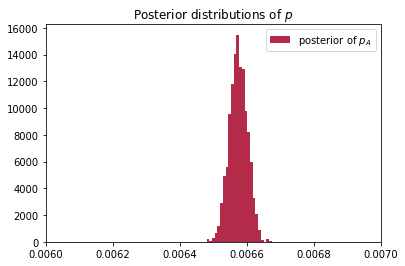

In [14]:
p = burned_trace["p"]
plt.xlim(0.006, 0.007)
plt.hist(p, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628", normed=True)
# plt.vlines(true_p_A, 0, 80, linestyle="--", label="true $p_A$ (unknown)")
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p$")
